<a href="https://colab.research.google.com/github/muffin-head/Cancer-caseStudy/blob/Univariate-analysis/Cancer_caseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [39]:
import pandas as pd
text_data= pd.read_csv('/content/drive/MyDrive/data cancer/training_text/training_text',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
text_data.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


# Preprocessing

In [40]:
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
stop_word= set(stopwords.words('english'))
def preprocessing(text,index,col):
  if type(text) is not int:
    text_string=""
    text = re.sub('[^a-zA-Z0-9\n]',' ',text)
    text=re.sub('\s+',' ',text)
    text=text.lower()
    for word in text.split():
      if not word in stop_word:
        text_string+=word+" "
    text_data[col][index]=text_string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:

for index, row in text_data.iterrows():
  if type(row['TEXT']) is str:
    preprocessing(row['TEXT'],index,'TEXT')

<ipython-input-40-b4091df54337>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data[col][index]=text_string


In [42]:
text_data.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [43]:
variants_data=pd.read_csv('/content/drive/MyDrive/data cancer/training_variants/training_variants')

In [44]:
variants_data.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [45]:
data=pd.merge(text_data,variants_data,on='ID',how='left')
data=data.dropna(subset=['TEXT'])
data.head()

,ID,TEXT,Gene,Variation,Class
0,0,cyclin dependent kinases cdks regulate variety...,FAM58A,Truncating Mutations,1
1,1,abstract background non small cell lung cancer...,CBL,W802*,2
2,2,abstract background non small cell lung cancer...,CBL,Q249E,2
3,3,recent evidence demonstrated acquired uniparen...,CBL,N454D,3
4,4,oncogenic mutations monomeric casitas b lineag...,CBL,L399V,4


In [46]:
y_actual=data['Class'].values
data.Gene=data.Gene.replace('\s+','_')
data.Variation=data.Variation.replace('\s+','_')


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data,y_actual,stratify=y_actual,test_size=0.2)
train_df,train_cv,y_train,y_cv=train_test_split(X_train,Y_train,stratify=Y_train)

# Check the distribution


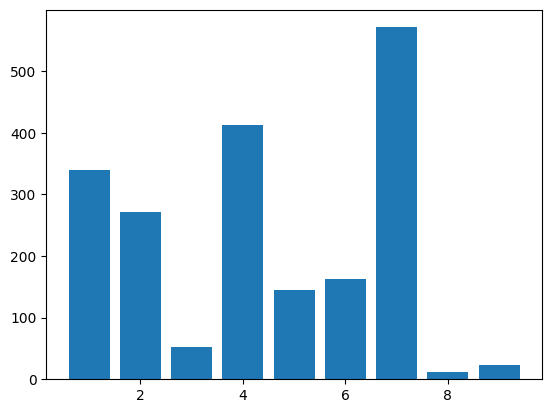

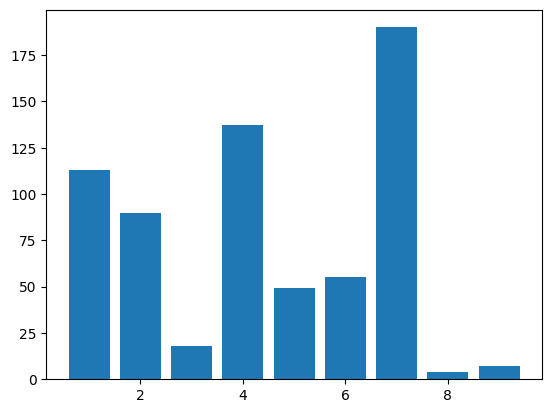

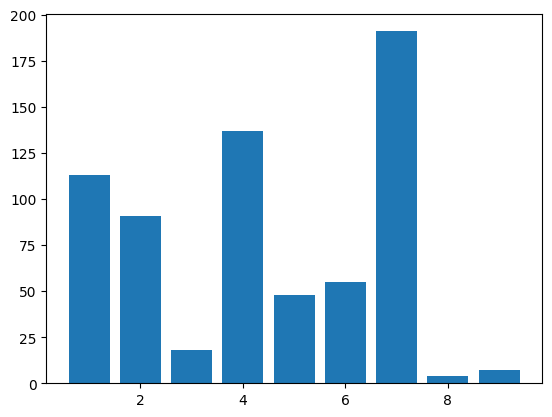

In [48]:
import matplotlib.pyplot as plt
counts=train_df['Class'].value_counts()
counts_cv=train_cv['Class'].value_counts()
counts_test=X_test['Class'].value_counts()

plt.bar(counts.index,counts.values)
plt.show()
plt.bar(counts_cv.index,counts_cv.values)
plt.show()
plt.bar(counts_test.index,counts_test.values)

plt.show()

# Build the random model

In [49]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
def cm(test_y,test_pred):
  cm=confusion_matrix(test_y,test_pred)
  disp=ConfusionMatrixDisplay(cm,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  A=((cm.T)/((cm.sum(axis=1)).T))
  B=(cm/cm.sum(axis=0))
  disp=ConfusionMatrixDisplay(A,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()
  disp=ConfusionMatrixDisplay(B,display_labels=[1,2,3,4,5,6,7,8,9])
  disp.plot()

In [50]:
import numpy as np
np.random.rand(1,9)/np.sum(np.random.rand(1,9)[0])

array([[0.083209  , 0.08671747, 0.22064262, 0.15299525, 0.25680445,
        0.12693556, 0.19786661, 0.01695661, 0.19101374]])

In [51]:
from sklearn.metrics import log_loss
test_data_len=X_test.shape[0]
cv_data_len=train_cv.shape[0]
cv_prd=np.zeros((cv_data_len,9))
for i in range(cv_data_len):
  prob=np.random.rand(1,9)
  cv_prd[i]=((prob/(np.sum(prob)))[0])
print("Random model logloss for validatio set is "),+ log_loss(y_cv,cv_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.473896068313774)

In [52]:

test_prd=np.zeros((test_data_len,9))
for i in range(test_data_len):
  prob_test=np.random.rand(1,9)
  test_prd[i]=((prob_test/(np.sum(prob_test)))[0])
print("Random model logloss for validatio set is "),+ log_loss(Y_test,test_prd,eps=1e-15)

Random model logloss for validatio set is 


(None, 2.47820729667072)

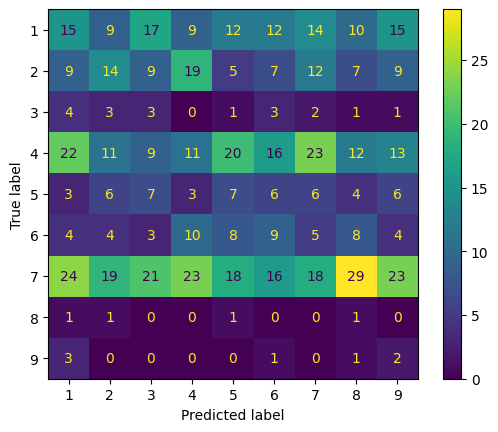

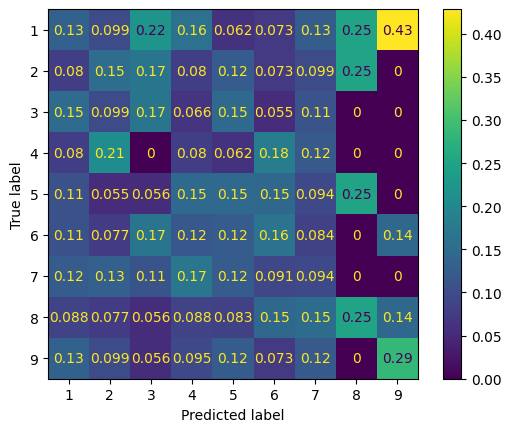

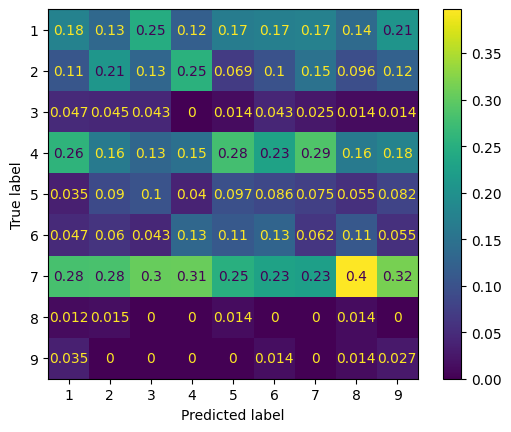

In [53]:
y_predicted=np.argmax(test_prd,axis=1)
cm(Y_test,y_predicted+1)

# Univar analysis

In [54]:
gene_feat= train_df['Gene'].value_counts()
print('gene total no.=',gene_feat.shape[0])
print('count of each of it is =')
gene_feat.head(10)

gene total no.= 225
count of each of it is =


BRCA1     168
TP53      101
PTEN       76
EGFR       75
BRCA2      72
KIT        59
BRAF       59
ERBB2      40
ALK        40
PDGFRA     35
Name: Gene, dtype: int64

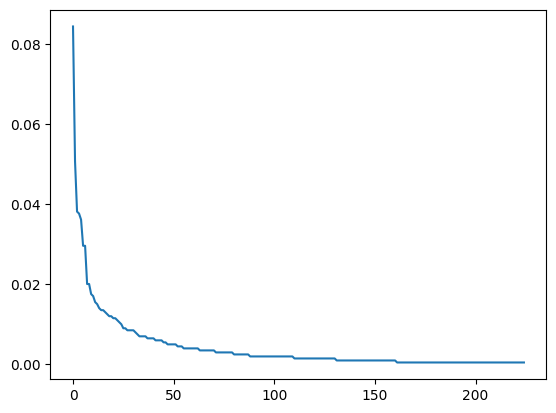

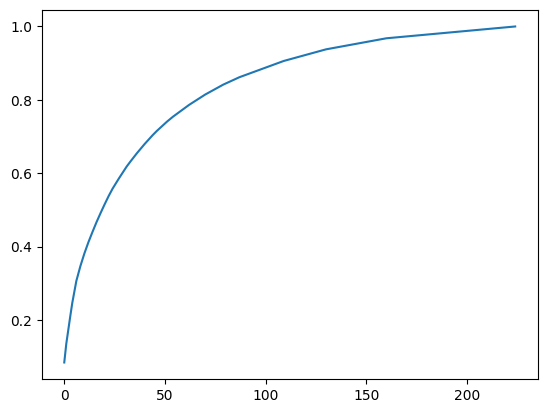

In [55]:
s=sum(gene_feat.values)
h=gene_feat.values/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

In [56]:
sum(gene_feat.values)

1989

# Univar Variation analysis

In [57]:
unique_var=train_df['Variation'].value_counts()
print('unique variation count is', unique_var.shape[0])

unique variation count is 1811


In [58]:
unique_var

Truncating Mutations    56
Deletion                49
Amplification           38
Fusions                 21
Overexpression           3
                        ..
S267_D273dup             1
T340A                    1
R1751P                   1
P168T                    1
A57V                     1
Name: Variation, Length: 1811, dtype: int64

In [59]:
train_df.shape

(1989, 5)

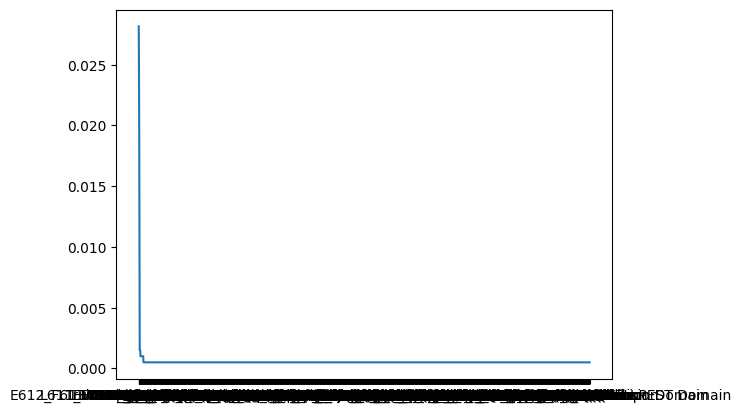

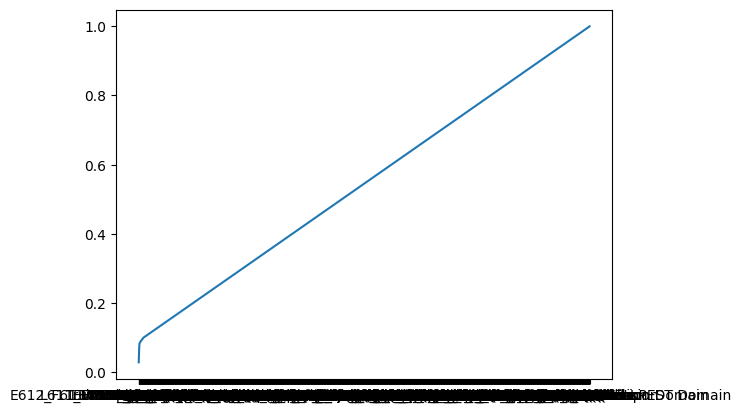

In [60]:
s= sum(unique_var.values)
h=unique_var/s
plt.plot(h)
plt.show()
c=np.cumsum(h)
plt.plot(c)
plt.show()

# Building model for gene and variation for feature

In [61]:
data.loc[(data['Class']==1)&(data['Gene']=='BRCA1')].shape

(60, 5)

In [62]:
#train_df.loc[(train_df['Class']==1)& (train_df['Gene']=='BRCA1')].shape[0]

"""a=train_df['Gene'].value_counts().items()
for i,b in a:
  print(b)"""


def response_coding_dict(alpha,feature,data):
  feature_dict=dict()
  for i, j in data[feature].value_counts().items():
    vec_prob=[]
    for k in range(1,10):
      class_locate= data.loc[(data['Class']==k)&(data[feature]==i)]
      vec_prob.append((class_locate.shape[0] + 10*alpha)/ (j + 90 * alpha))
    feature_dict[i]=vec_prob
  return feature_dict
def response_coding(alpha,feature,data):
  response_dict=response_coding_dict(alpha,feature,data)
  dict_to_compare=data[feature].value_counts()
  response_coded=[]
  for _, row in data.iterrows():
    if row[feature] in dict(dict_to_compare).keys():
      response_coded.append(response_dict[row[feature]])
    else:
      response_coded.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
  return response_coded

In [63]:
training_response_coded_gene= np.array(response_coding(1,"Gene",train_df))
val_response_coded_gene=np.array(response_coding(1,"Gene",train_cv))
test_response_coded_gene=np.array(response_coding(1,"Gene",X_test))

In [64]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(training_response_coded_gene,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(training_response_coded_gene,y_train)
  predict_y=model_cc.predict_proba(val_response_coded_gene)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))


In [65]:

best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(training_response_coded_gene,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(training_response_coded_gene,y_train)
predict_y=model_cc.predict_proba(training_response_coded_gene)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(val_response_coded_gene)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(test_response_coded_gene)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  1.3302333333183314
for best alpha logloss is  1.4667470949914458
for best alpha logloss is  1.4642851921397397


In [66]:
training_response_coded_var= np.array(response_coding(1,"Variation",train_df))
val_response_coded_var=np.array(response_coding(1,"Variation",train_cv))
test_response_coded_var=np.array(response_coding(1,"Variation",X_test))

In [67]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(training_response_coded_var,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(training_response_coded_var,y_train)
  predict_y=model_cc.predict_proba(val_response_coded_var)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))


In [68]:
best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(training_response_coded_var,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(training_response_coded_var,y_train)
predict_y=model_cc.predict_proba(training_response_coded_var)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(val_response_coded_var)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(test_response_coded_var)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  0.933559740706388
for best alpha logloss is  1.0450282486919846
for best alpha logloss is  0.9812366828360779


# Text preprocessing

In [69]:
"""training_response_coded_text= np.array(response_coding(1,"TEXT",train_df))
val_response_coded_text=np.array(response_coding(1,"TEXT",train_cv))
test_response_coded_text=np.array(response_coding(1,"TEXT",X_test))"""

'training_response_coded_text= np.array(response_coding(1,"TEXT",train_df))\nval_response_coded_text=np.array(response_coding(1,"TEXT",train_cv))\ntest_response_coded_text=np.array(response_coding(1,"TEXT",X_test))'

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
vectorizer=TfidfVectorizer(min_df=3)
tfidf_train=vectorizer.fit_transform(train_df['TEXT'])
tfidf_train=normalize(tfidf_train,axis=0)
tfidf_cv=vectorizer.transform(train_cv['TEXT'])
tfidf_cv=normalize(tfidf_cv,axis=0)
tfidf_test=vectorizer.transform(X_test['TEXT'])
tfidf_test=normalize(tfidf_test,axis=0)


'''

def term_freq(text):
  term_cnt=defaultdict(int)
  for i in text.split():
    term_cnt[i]+=1
  total_word=len(text.split())
  for i in term_cnt:
    term_cnt[i]=(term_cnt[i]/total_word)
  return term_cnt

def inverse_doc_freq(document):
  corpus_len=len(document)
  term_cnt=defaultdict(lambda: 0)
  for i in document:
    for j in set(i.split()):
      term_cnt[j]+=1
  for i,j in term_cnt.items():
    term_cnt[i]=math.log(corpus_len/( j+1))
  return term_cnt

def tfidf(document):
  idf=inverse_doc_freq(document)
  tfidf_vec=[]
  for i in document:
    tf=term_freq(i)
    tfidf={}
    for i,j in tf.items():
      tfidf[i]=j*idf[i]
    tfidf_vec.append(tfidf)
  return tfidf_vec
  '''



'\n\ndef term_freq(text):\n  term_cnt=defaultdict(int)\n  for i in text.split():\n    term_cnt[i]+=1\n  total_word=len(text.split())\n  for i in term_cnt:\n    term_cnt[i]=(term_cnt[i]/total_word)\n  return term_cnt\n\ndef inverse_doc_freq(document):\n  corpus_len=len(document)\n  term_cnt=defaultdict(lambda: 0)\n  for i in document:\n    for j in set(i.split()):\n      term_cnt[j]+=1\n  for i,j in term_cnt.items():\n    term_cnt[i]=math.log(corpus_len/( j+1))\n  return term_cnt\n\ndef tfidf(document):\n  idf=inverse_doc_freq(document)\n  tfidf_vec=[]\n  for i in document:\n    tf=term_freq(i)\n    tfidf={}\n    for i,j in tf.items():\n      tfidf[i]=j*idf[i]\n    tfidf_vec.append(tfidf)\n  return tfidf_vec\n  '

In [71]:
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
alpha =[10**x for x in range(-5,1)]
log_error=[]
for i in alpha:
  model=sgd(alpha=1,penalty='l2',loss='log_loss')
  model.fit(tfidf_train,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(tfidf_train,y_train)
  predict_y=model_cc.predict_proba(tfidf_cv)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))
best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty='l2',loss='log_loss')
model.fit(tfidf_train,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(tfidf_train,y_train)
predict_y=model_cc.predict_proba(tfidf_train)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(tfidf_cv)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(tfidf_test)
print("for best alpha logloss is ",log_loss(Y_test,predict_y,labels=model.classes_))

for best alpha logloss is  1.3794917909655058
for best alpha logloss is  1.5471312270865427
for best alpha logloss is  1.5657674504558734


# Stacking the features

In [71]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

"""training_response_coded_gene=csr_matrix(training_response_coded_gene.reshape(-1, 1))
training_response_coded_var=csr_matrix(training_response_coded_var.reshape(-1, 1))
"""
gene_var_train=np.hstack((training_response_coded_gene,training_response_coded_var))
print
Xtrain=hstack((tfidf_train,gene_var_train))
y_train=np.array(list(train_df['Class']))

gene_var_cv= np.hstack((val_response_coded_gene,val_response_coded_var))
Xcv= hstack((tfidf_cv,gene_var_cv))
y_cv=np.array(list(train_cv['Class']))

gene_var_test= np.hstack((test_response_coded_gene,test_response_coded_var))
Xtest= hstack((tfidf_test,gene_var_test))
y_test=np.array(list(X_test['Class']))

# Building a baseline model

In [73]:
from sklearn.naive_bayes import MultinomialNB
alpha =[10**x for x in range(-5,4)]
log_error=[]
for i in alpha:
  model=MultinomialNB(alpha=i)
  model.fit(Xtrain,y_train)
  model_cc=cc(model,method='sigmoid')
  model_cc.fit(Xtrain,y_train)
  predict_y=model_cc.predict_proba(Xcv)
  log_error.append(log_loss(y_cv,predict_y,labels=model.classes_))
best_alpha=np.min(log_error)
model=MultinomialNB(alpha=best_alpha)
model.fit(Xtrain,y_train)
model_cc=cc(model,method='sigmoid')
model_cc.fit(Xtrain,y_train)
predict_y=model_cc.predict_proba(Xtrain)
print("for best alpha logloss is ",log_loss(y_train,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(Xcv)
print("for best alpha logloss is ",log_loss(y_cv,predict_y,labels=model.classes_))
predict_y=model_cc.predict_proba(Xtest)
print("for best alpha logloss is ",log_loss(y_test,predict_y,labels=model.classes_))

for best alpha logloss is  0.960177024811169
for best alpha logloss is  1.334513084149742
for best alpha logloss is  1.3273926511905234


# Feature importance feature collection

In [144]:
from enum import EnumMeta
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
def feature_importance(indice_of_feature,Gene,Var,Text,no_of_feat):
  gene_vec_count=CountVectorizer()
  var_vec_count=CountVectorizer()
  text_vec_count=CountVectorizer(min_df=3)
  gene_vec=gene_vec_count.fit(train_df['Gene'])
  var_vec=var_vec_count.fit(train_df['Variation'])
  text_vec=text_vec_count.fit(train_df['TEXT'])
  gene_feat_len=len(gene_vec.get_feature_names_out())
  var_feat_len=len(var_vec.get_feature_names_out())
  word_count=0
  feature_cloud=[]
  for index, feature in enumerate(indice_of_feature):
    if feature <  gene_feat_len:

      gene_feature_name=gene_vec.get_feature_names_out()[feature]
      ispresent= Gene==gene_feature_name
      if ispresent:
        feature_cloud.append(gene_feature_name)
        word_count+=1
        print("this gene feature is responsible for prediction ->",gene_feature_name)
    elif feature < gene_feat_len+var_feat_len:
      var_feature_name=var_vec.get_feature_names_out()[feature-gene_feat_len]
      ispresent= Var==var_feature_name
      if ispresent:
        feature_cloud.append(var_feature_name)
        word_count+=1
        print("this variation feature is responsible for prediction",var_feature_name)
    else:
      text_feature_name=text_vec.get_feature_names_out()[feature-(gene_feat_len+var_feat_len)]
      ispresent= text_feature_name in Text.split()
      if ispresent:
        feature_cloud.append(text_feature_name)
        word_count+=1
        print("this text feature is responsible for prediction",text_feature_name)
  print("from the top feature: ",word_count,"feature are present in query point")
  text = " ".join(feature_cloud)

# Create a word cloud object
  wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

  # Display the generated word cloud
  plt.figure(figsize=(8, 8), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)

  plt.show()

# Logistic regresion

In [84]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.calibration import CalibratedClassifierCV as cc
from sklearn.metrics import log_loss
import numpy as np

# Scaling the data
scaler = StandardScaler(with_mean=False) # or MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xcv = scaler.transform(Xcv)
Xtest = scaler.transform(Xtest)

alpha=[1**alpha for alpha in range(-5,2)]
log_error=[]
for i in alpha:
  model=sgd(alpha=i,penalty="l2",loss="log_loss")
  model.fit(Xtrain,y_train)
  model_cc=cc(model,method="sigmoid")
  model_cc.fit(Xtrain,y_train)
  y_pred=model_cc.predict_proba(Xcv)
  log_error.append(log_loss(y_cv,y_pred,labels=model.classes_))

best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty="l2",loss="log_loss")
model.fit(Xtrain,y_train)
model_cc=cc(model,method="sigmoid")
model_cc.fit(Xtrain,y_train)
y_pred=model_cc.predict_proba(Xtrain)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_train,y_pred,labels=model.classes_))

y_pred=model_cc.predict_proba(Xcv)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_cv,y_pred,labels=model.classes_))

y_pred=model_cc.predict_proba(Xtest)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_test,y_pred,labels=model.classes_))


logloss for for best alpha thats is  1.0901731340973915 is 0.5550678286602044
logloss for for best alpha thats is  1.0901731340973915 is 1.0928258005112557
logloss for for best alpha thats is  1.0901731340973915 is 1.0407516325302666


In [85]:

# Scaling the data
scaler = StandardScaler(with_mean=False) # or MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xcv = scaler.transform(Xcv)
Xtest = scaler.transform(Xtest)

alpha=[1**alpha for alpha in range(-5,2)]
log_error=[]
for i in alpha:
  model=sgd(alpha=i,penalty="l2",loss="log_loss",class_weight="balanced")
  model.fit(Xtrain,y_train)
  model_cc=cc(model,method="sigmoid")
  model_cc.fit(Xtrain,y_train)
  y_pred=model_cc.predict_proba(Xcv)
  log_error.append(log_loss(y_cv,y_pred,labels=model.classes_))

best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty="l2",loss="log_loss",class_weight="balanced")
model.fit(Xtrain,y_train)
model_cc=cc(model,method="sigmoid")
model_cc.fit(Xtrain,y_train)
y_pred=model_cc.predict_proba(Xtrain)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_train,y_pred,labels=model.classes_))

y_pred=model_cc.predict_proba(Xcv)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_cv,y_pred,labels=model.classes_))

y_pred=model_cc.predict_proba(Xtest)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_test,y_pred,labels=model.classes_))


logloss for for best alpha thats is  1.0953748073610903 is 0.5589290447018446
logloss for for best alpha thats is  1.0953748073610903 is 1.1006062123206402
logloss for for best alpha thats is  1.0953748073610903 is 1.0479100403285793


this text feature is responsible for prediction e507q
this text feature is responsible for prediction 3c
this text feature is responsible for prediction rab
this text feature is responsible for prediction colony
this text feature is responsible for prediction lipid
this text feature is responsible for prediction greatest
this text feature is responsible for prediction full
this text feature is responsible for prediction identical
this text feature is responsible for prediction ethics
this text feature is responsible for prediction pt2g1
this text feature is responsible for prediction abolish
this text feature is responsible for prediction lucc1
from the top feature:  12 feature are present in query point


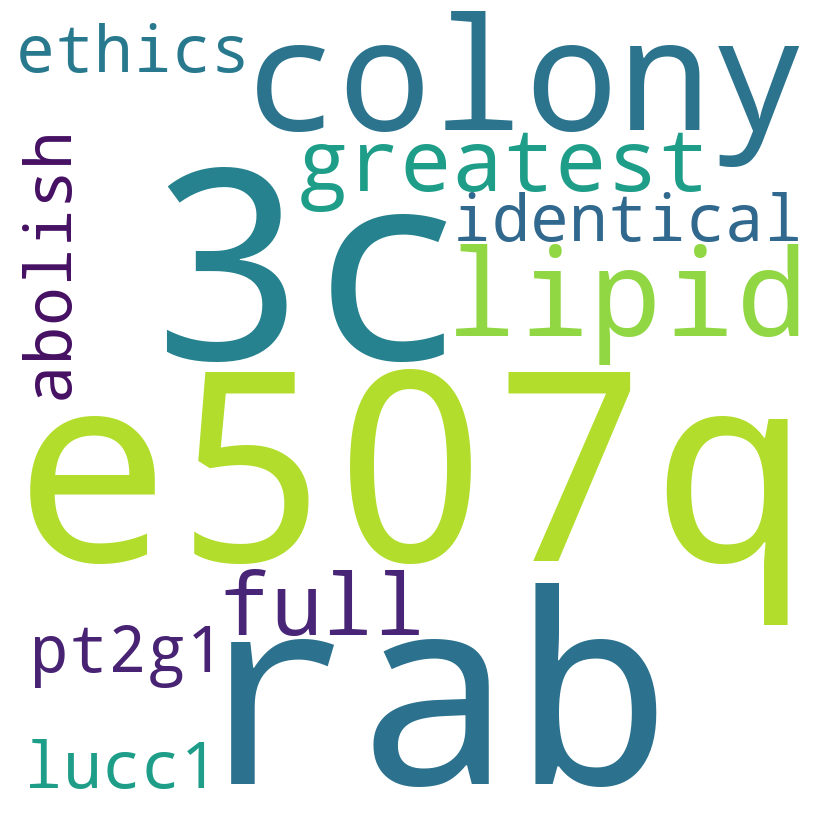

In [145]:
predict_for_one_index=(model_cc.predict(Xtest[19]))
indices=np.argsort(-model.coef_)[predict_for_one_index-1][:,:500]
feature_cloud=feature_importance(indices[0],X_test['Gene'].iloc[19],X_test['Variation'].iloc[19],X_test['TEXT'].iloc[19],500)

# Linear SVM

In [137]:

# Scaling the data
scaler = StandardScaler(with_mean=False) # or MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xcv = scaler.transform(Xcv)
Xtest = scaler.transform(Xtest)

alpha=[1**alpha for alpha in range(-5,2)]
log_error=[]
for i in alpha:
  model=sgd(alpha=i,penalty="l2",loss="hinge",class_weight="balanced")
  model.fit(Xtrain,y_train)
  model_cc=cc(model,method="sigmoid")
  model_cc.fit(Xtrain,y_train)
  y_pred=model_cc.predict_proba(Xcv)
  log_error.append(log_loss(y_cv,y_pred,labels=model.classes_))

best_alpha=np.min(log_error)
model=sgd(alpha=best_alpha,penalty="l2",loss="hinge",class_weight="balanced")
model.fit(Xtrain,y_train)
model_cc=cc(model,method="sigmoid")
model_cc.fit(Xtrain,y_train)
y_pred=model_cc.predict_proba(Xtrain)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_train,y_pred,labels=model.classes_))

y_pred=model_cc.predict_proba(Xcv)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_cv,y_pred,labels=model.classes_))

y_pred=model_cc.predict_proba(Xtest)
print("logloss for for best alpha thats is ",best_alpha,"is",log_loss(y_test,y_pred,labels=model.classes_))


logloss for for best alpha thats is  1.2074418106423261 is 0.7288408957276127
logloss for for best alpha thats is  1.2074418106423261 is 1.2207779097470295
logloss for for best alpha thats is  1.2074418106423261 is 1.1538409965351044


this text feature is responsible for prediction e507q
this text feature is responsible for prediction 3c
this text feature is responsible for prediction rab
this text feature is responsible for prediction colony
this text feature is responsible for prediction lipid
this text feature is responsible for prediction greatest
this text feature is responsible for prediction full
this text feature is responsible for prediction identical
this text feature is responsible for prediction ethics
this text feature is responsible for prediction pt2g1
this text feature is responsible for prediction abolish
this text feature is responsible for prediction lucc1
from the top feature:  12 feature are present in query point


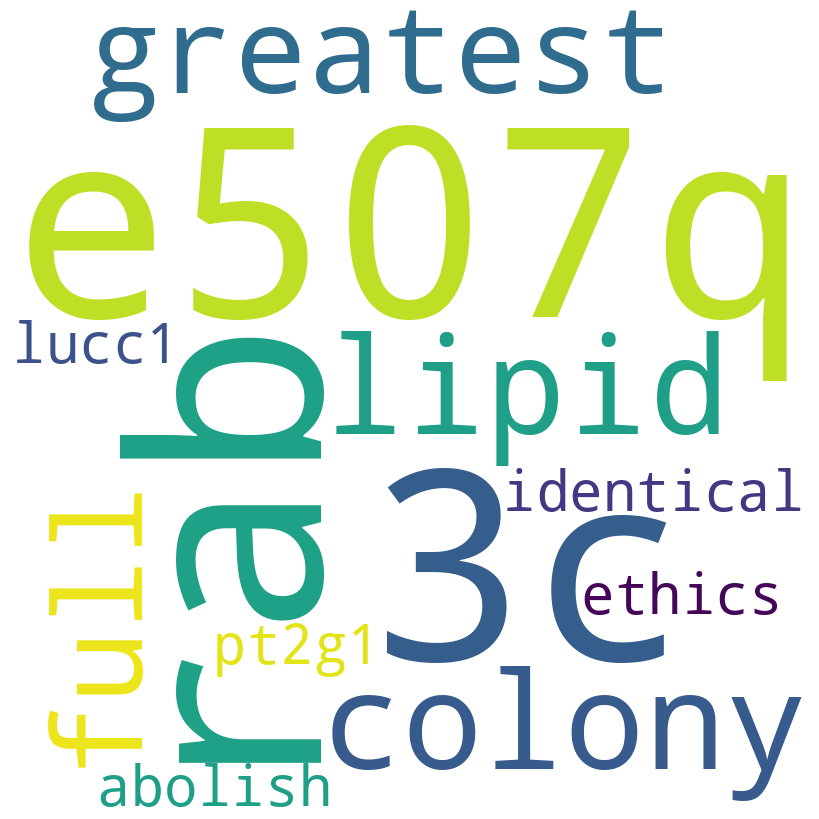

In [146]:
predict_for_one_index=(model_cc.predict(Xtest[19]))
indices=np.argsort(-model.coef_)[predict_for_one_index-1][:,:500]
feature_importance(indices[0],X_test['Gene'].iloc[19],X_test['Variation'].iloc[19],X_test['TEXT'].iloc[19],500)

# STACKING MODEL NOT IMPLEMENTED BCZ IT DNT SUPPORT INTERPRETIBILITY

In [ ]:
"""
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10]
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error
        """